In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [3]:
df = pd.read_csv("segmentation_data.csv")
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [4]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
df_numeric = df[["ID","Age","Income"]]
df_numeric

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [7]:
scaler = MinMaxScaler()

scaler.fit(df[["Age"]])
df["Age"]= scaler.transform(df[["Age"]])



In [9]:
scaler.fit(df[["Income"]])
df["Income"]= scaler.transform(df[["Income"]])


In [10]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,0.844828,2,0.324781,1,2
1,100000002,1,1,0.068966,1,0.420210,1,2
2,100000003,0,0,0.534483,1,0.195144,0,0
3,100000004,0,0,0.465517,1,0.496223,1,1
4,100000005,0,0,0.603448,1,0.413842,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,0.500000,1,0.320595,0,0
1996,100001997,1,1,0.155172,1,0.299460,1,0
1997,100001998,0,0,0.224138,0,0.184871,0,0
1998,100001999,1,1,0.103448,1,0.227162,0,0


In [11]:
df = df.drop(["ID"], axis=1)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1
...,...,...,...,...,...,...,...
1995,1,0,0.500000,1,0.320595,0,0
1996,1,1,0.155172,1,0.299460,1,0
1997,0,0,0.224138,0,0.184871,0,0
1998,1,1,0.103448,1,0.227162,0,0


In [12]:
mark_array = df.values
mark_array[:,2] = mark_array[:,2].astype(float)
mark_array[:,4] = mark_array[:,4].astype(float)


### Model

In [14]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0,1,3,5,6])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 844, ncost: 171.59474205277004
Run: 1, iteration: 2/20, moves: 124, ncost: 170.6783272595141
Run: 1, iteration: 3/20, moves: 74, ncost: 170.1609869939061
Run: 1, iteration: 4/20, moves: 66, ncost: 169.14767539219903
Run: 1, iteration: 5/20, moves: 54, ncost: 169.00911465071266
Run: 1, iteration: 6/20, moves: 23, ncost: 168.982705480225
Run: 1, iteration: 7/20, moves: 12, ncost: 168.9689596409227
Run: 1, iteration: 8/20, moves: 12, ncost: 168.95582684924577
Run: 1, iteration: 9/20, moves: 6, ncost: 168.94918748595018
Run: 1, iteration: 10/20, moves: 12, ncost: 168.94210670483815
Run: 1, iteration: 11/20, moves: 1, ncost: 168.9416697165403
Run: 1, iteration: 12/20, moves: 4, ncost: 168.9396253815938
Run: 1, iteration: 13/20, moves: 0, ncost: 168.9396253815938
Init: initializing centroids
Init: initializ

In [15]:
print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

[[0.36891828 0.31551416 0.         0.         1.         1.
  0.        ]
 [0.17685931 0.17535455 1.         1.         1.         0.
  0.        ]
 [0.62704174 0.3782333  1.         1.         2.         1.
  0.        ]
 [0.37814682 0.54026944 0.         0.         1.         2.
  2.        ]
 [0.1592334  0.27713601 0.         0.         0.         1.
  0.        ]
 [0.53225253 0.3832823  0.         0.         1.         1.
  1.        ]
 [0.21117543 0.33905725 0.         1.         1.         1.
  1.        ]
 [0.42722232 0.21782123 0.         0.         1.         0.
  0.        ]
 [0.17848848 0.32917487 1.         1.         1.         1.
  1.        ]
 [0.15802223 0.28363575 1.         1.         1.         1.
  0.        ]]


10

In [37]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)
    
    
df["cluster"]=cluster_dict

In [25]:
df[["ID", "Age", "Income"]] = df_numeric
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
0,0,0,67,2,124670,1,2,5,100000001
1,1,1,22,1,150773,1,2,8,100000002
2,0,0,49,1,89210,0,0,7,100000003
3,0,0,45,1,171565,1,1,5,100000004
4,0,0,53,1,149031,1,1,5,100000005
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,7,100001996
1996,1,1,27,1,117744,1,0,9,100001997
1997,0,0,31,0,86400,0,0,4,100001998
1998,1,1,24,1,97968,0,0,1,100001999


In [30]:
df[df["cluster"]==0].head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
16,0,0,53,1,125550,1,0,0,100000017
46,0,0,39,1,140182,1,0,0,100000047
68,0,0,37,1,106978,1,2,0,100000069
97,0,0,34,1,134794,1,2,0,100000098
150,0,0,42,1,119926,1,0,0,100000151


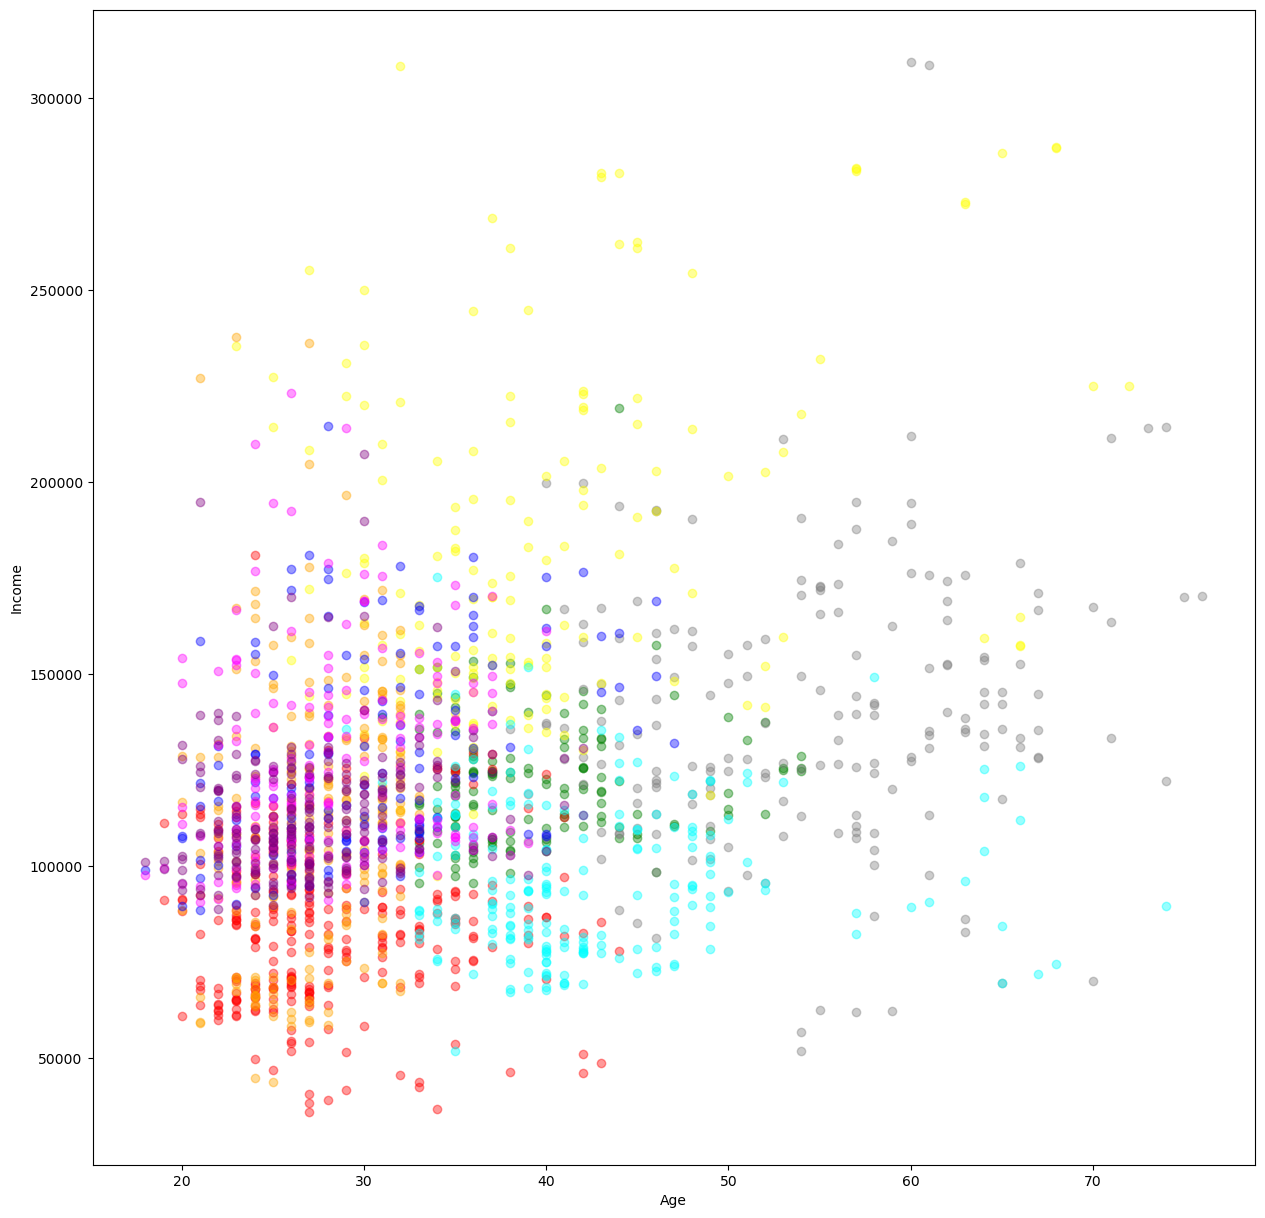

In [36]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]

plt.figure(figsize=(15,15))
plt.xlabel("Age")
plt.ylabel("Income")

plt.scatter(df1.Age, df1.Income, color="green", alpha=0.4)
plt.scatter(df2.Age, df2.Income, color="red", alpha=0.4)
plt.scatter(df3.Age, df3.Income, color="gray", alpha=0.4)
plt.scatter(df4.Age, df4.Income, color="yellow", alpha=0.4)
plt.scatter(df5.Age, df5.Income, color="orange", alpha=0.4)
plt.scatter(df6.Age, df6.Income, color="blue", alpha=0.4)
plt.scatter(df7.Age, df7.Income, color="cyan", alpha=0.4)
plt.scatter(df8.Age, df8.Income, color="magenta", alpha=0.4)
plt.scatter(df9.Age, df9.Income, color="purple", alpha=0.4)
plt.scatter(df10.Age, df10.Income, color="brown", alpha=0.4)

plt.show()